In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
train_df = pd.read_csv(r"C:\Users\Sai Vinay Matcha\Downloads\TRAIN.csv")
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [34]:
test_df = pd.read_csv(r"C:\Users\Sai Vinay Matcha\Downloads\TEST_FINAL.csv")
test_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [35]:
sample_df = pd.read_csv(r"C:\Users\Sai Vinay Matcha\Downloads\SAMPLE.csv")
sample_df.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [36]:
train_df.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [37]:
test_df.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [40]:
X = train_df.drop(columns=['ID','Date','#Order'])
X_test = test_df.drop(columns=['ID','Date'])


In [41]:
X.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,S1,L3,R1,1,Yes,7011.84
1,253,S4,L2,R1,1,Yes,51789.12
2,252,S3,L2,R1,1,Yes,36868.20
3,251,S2,L3,R1,1,Yes,19715.16
4,250,S2,L3,R4,1,Yes,45614.52


In [42]:
from sklearn.preprocessing import LabelEncoder 

cat_cols = [e for e in X.columns if X[e].dtype == "object"]

print("Categorical columns are : ",cat_cols,X.columns)


for ec in cat_cols:
    dummy_col = None
    dummy_col = ps.get_dummies(X[ec])
    X = ps.concat([X,dummy_col],axis=1)
    X = X.drop([ec],axis=1)

X.head(10)

Categorical columns are :  ['Store_Type', 'Location_Type', 'Region_Code', 'Discount'] Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Sales'],
      dtype='object')


,Store_id,Holiday,Sales,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,1,1,7011.84,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,253,1,51789.12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,252,1,36868.20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,251,1,19715.16,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,250,1,45614.52,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
5,249,1,34211.22,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6,248,1,35352.66,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
7,247,1,52650.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8,246,1,42633.78,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
9,254,1,62572.80,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1


In [43]:
# Repeating for X_test
cat_cols = [e for e in X_test.columns if X_test[e].dtype == "object"]

for ec in cat_cols:
    dummy_col = None
    dummy_col = ps.get_dummies(X_test[ec])
    X_test = ps.concat([X_test,dummy_col],axis=1)
    X_test = X_test.drop([ec],axis=1)

X_test.head(10)

,Store_id,Holiday,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,171,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
1,172,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,173,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,174,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,170,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
5,175,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
6,176,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
7,169,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
8,14,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
9,177,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0


In [44]:
from sklearn.model_selection import train_test_split


y = X['Sales'] 
X = X.drop(columns=['Sales'])

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.78,random_state=42 ) 

print("X_train columns are : ",X_train.head())

X_train columns are :          Store_id  Holiday  S1  S2  S3  S4  L1  L2  L3  L4  L5  R1  R2  R3  R4  \
176645        89        0   1   0   0   0   0   0   0   1   0   1   0   0   0   
49906        178        0   0   0   1   0   0   1   0   0   0   0   0   1   0   
171161        84        1   1   0   0   0   1   0   0   0   0   0   0   1   0   
134179       227        0   0   0   0   1   0   1   0   0   0   1   0   0   0   
12919         54        0   1   0   0   0   0   1   0   0   0   0   0   1   0   

        No  Yes  
176645   1    0  
49906    0    1  
171161   1    0  
134179   0    1  
12919    1    0  


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [47]:
rf_reg_model = RandomForestRegressor() #max_depth=15,max_features='auto',n_estimators=80)

rf_reg_model.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
pred1 = rf_reg_model.predict(X_valid) 

In [49]:
rf_r2 = rf_reg_model.score(X_valid,y_valid)
print("R2 Score: ",rf_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred1)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred1)))
print('RMSE:{}'.format(ny.sqrt(mean_squared_error(y_valid,pred1))))

R2 Score:  0.6445622480866409
MAE:7646.792420778904
MSE:120193019.05821367
RMSE:10963.25768456683


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg_model = GradientBoostingRegressor()

gb_reg_model.fit(X_train,y_train)

gb_reg_model.score(X_valid,y_valid)

pred2 = gb_reg_model.predict(X_valid) 

In [51]:
gb_r2 = gb_reg_model.score(X_valid,y_valid)
print("R2 Score: ",gb_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred2)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred2)))
print('RMSE:{}'.format(ny.sqrt(mean_squared_error(y_valid,pred2))))

R2 Score:  0.5969156913457162
MAE:8189.832283114252
MSE:136304935.90326554
RMSE:11674.97048832525


In [52]:
from xgboost import XGBRegressor

xgb_reg_model = XGBRegressor() #max_depth=4,n_estimators = 380,learning_rate = 0.02)

xgb_reg_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
xgb_reg_model.score(X_valid,y_valid)

pred3 = xgb_reg_model.predict(X_valid) 

In [54]:
xgb_r2 = xgb_reg_model.score(X_valid,y_valid)
print("R2 Score: ",xgb_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred3)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred3)))
print('RMSE:{}'.format(ny.sqrt(mean_squared_error(y_valid,pred3))))

R2 Score:  0.6462854348519869
MAE:7621.320310995385
MSE:119610315.0021218
RMSE:10936.650081360462


In [56]:
pred_x_test = xgb_reg_model.predict(X_test)

print(pred_x_test)

sample_df['Sales'] = pred_x_test

[49413.61  34947.383 70079.46  ... 48062.406 31819.64  25741.322]


In [57]:
sample_df.head(10)

,ID,Sales
0,T1188341,49413.609375
1,T1188342,34947.382812
2,T1188343,70079.460938
3,T1188344,33755.859375
4,T1188345,36836.148438
5,T1188346,87642.820312
6,T1188347,58191.421875
7,T1188348,43700.687500
8,T1188349,48616.117188
9,T1188350,31887.042969


In [59]:
sample_df.to_csv(r"C:\Users\Sai Vinay Matcha\OneDrive\Desktop\JOB-A-THON\vinaysubmission_1.csv")

<AxesSubplot:>

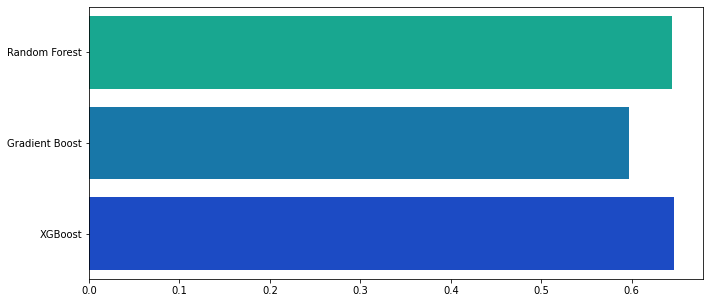

In [60]:
scores  = {
    "R2_score" : [rf_r2,gb_r2,xgb_r2],
    "Regressor" : ["Random Forest","Gradient Boost","XGBoost"],
}

plt.figure(figsize=(11,5))
sns.barplot(x=scores["R2_score"],y=scores["Regressor"],palette='winter_r')